### Text Mining 20th Century

In [1]:
#Import Library

from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/queency_yustiawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/queency_yustiawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/queency_yustiawan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Import the 20th Century scraped data

myfile = open('20thCentury_article_Wiki.txt', encoding='utf-8') 

In [3]:
with open('20thCentury_article_Wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

### Tokenisation

In [4]:
# Word tokenisation

from nltk.tokenize import word_tokenize
tokenised_word = word_tokenize(data)
print(tokenised_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 'd

In [5]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenised_word)
print(dist_words)

<FreqDist with 4882 samples and 20342 outcomes>


In [9]:
most_common_words = dist_words.most_common(10)

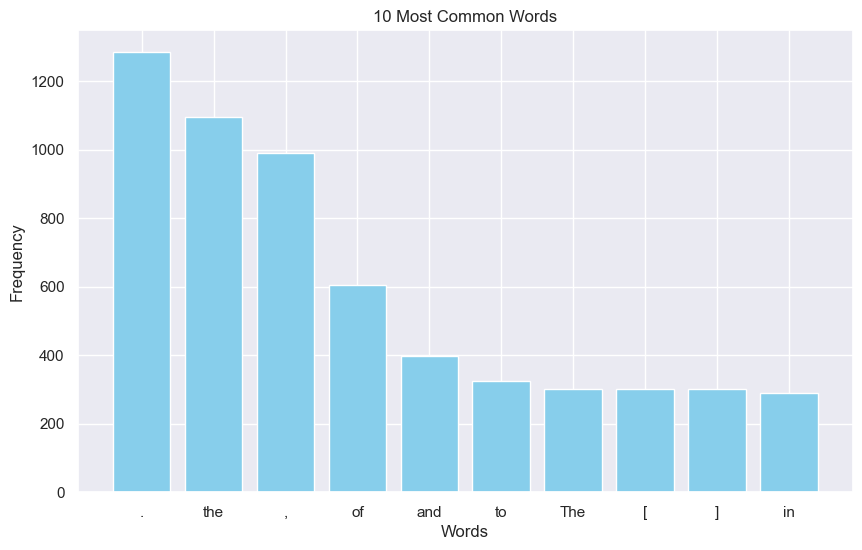

In [10]:
# Plotting Bar Chart for the 10 most common words

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('10 Most Common Words')
plt.show()

### Removing Stopwords

In [11]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [12]:
# Remove stopwords in words

filtered_words = [] # creates an empty list
for word in tokenised_word:
    if word not in stop_words:
        filtered_words.append(word)

In [13]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchAppearanceCreate',
 'accountLog',
 'inPersonal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1The',
 'world',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.1.2The',
 'Russian',
 'Revolution',
 'Communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War',
 'II',
 '(',
 '19

In [14]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4778 samples and 15684 outcomes>


In [15]:
most_common_words2 = dist_words_filter.most_common(10)

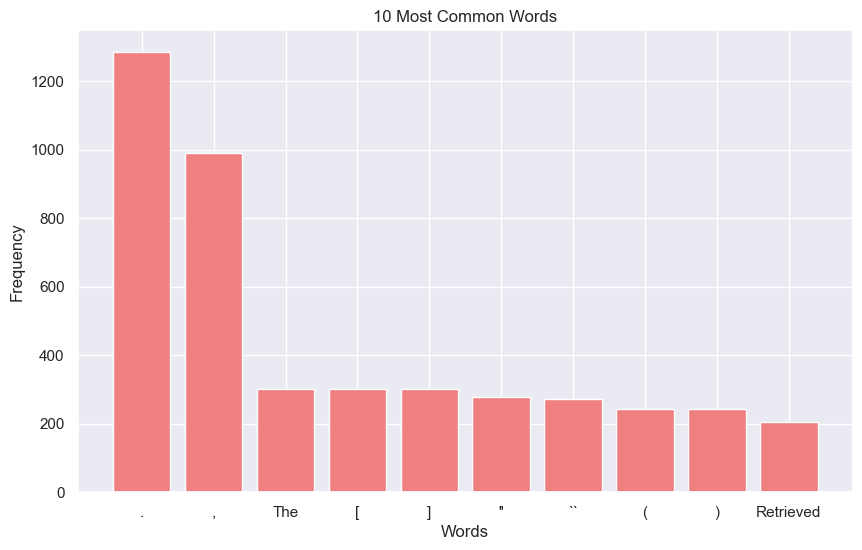

In [17]:
# Plot a new Bar Chart for the 10 most common words after removing stopwords

words, frequencies = zip(*most_common_words2)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='lightcoral')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('10 Most Common Words')
plt.show()

##### Removing only stopwords is not sufficient as the analysis still shows punctuation marks as part of the most common used strings.

In [18]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [20]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchAppearanceCreate    accountLog    inPersonal    tools    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   The    world    beginning    century               The    war    end    wars               World    War    I                                The    Russian    Revolution    Communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                The    war    Europe     Blitzkrieg     Operation    Ba

In [21]:
# Word tokenization

tokenised_word2 = word_tokenize(sans_punc)
print(tokenised_word2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Backgrou

In [23]:
# Create a new FreqDist after removing punctuations

dist_words_filter2 = FreqDist(tokenised_word2)

In [25]:
most_common_words3 = dist_words_filter2.most_common(10)

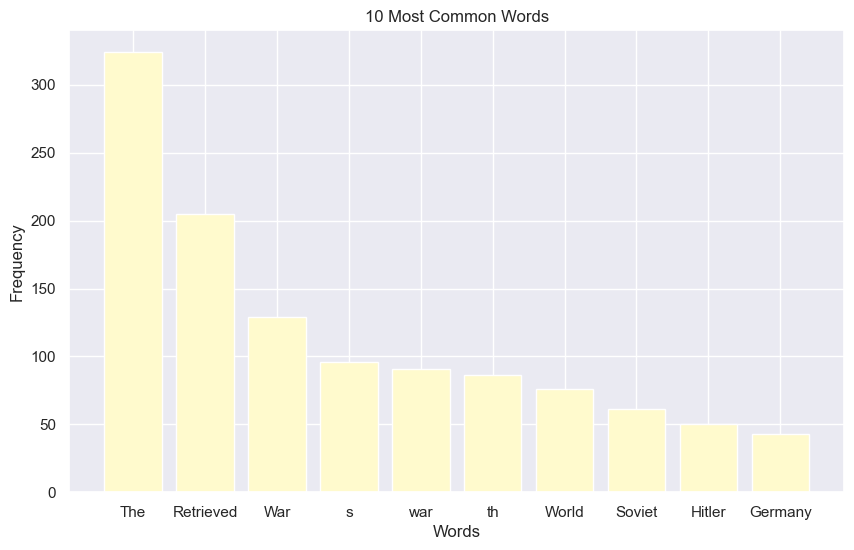

In [54]:
# Plot a new Bar Chart for the 10 most common words after removing stopwords and punctuations

words, frequencies = zip(*most_common_words3)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='lemonchiffon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('10 Most Common Words')
plt.show()

##### After removing the stop words and punctuation, the most common words now are more likely to be relevant to the main content of the text. Words such as "of" "and," "to," and the punctuations are no longer dominating the frequency chart, allowing more meaningful and important keywords within the text to surface. However, here it can still be seen the word "The", "s", and "th" from removing the punctuation are still leftovers and can be cleaned further.

In [37]:
# Remove more stopwords

new_stopwords = ["And", "Then", 'n', 'th', 's', 'The']

In [38]:
filtered = []
for word in tokenised_word2:
    if word not in new_stopwords:
        filtered.append(word)

### Taglist by TextBlob

In [39]:
%%time
text = TextBlob(str(filtered))

CPU times: user 11.4 ms, sys: 1.6 ms, total: 13 ms
Wall time: 22.2 ms


In [42]:
tags_list = text.tags

In [43]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchSearchAppearanceCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'tools", 'NNS'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'POS'),
 ("'learn", 'NNP'),
 ("'", 'POS')

In [46]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [49]:
df_text_group = df_text.groupby('Word type').count().reset_index()

In [50]:
df_text_group.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,14
3,EX,12
4,FW,43


In [51]:
top10_tags = df_text_group.nlargest(10, 'Words')

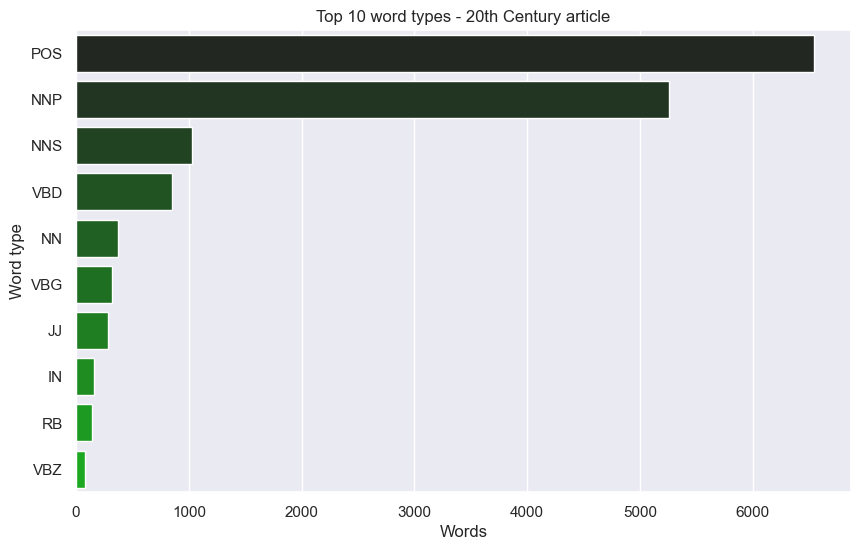

In [64]:
plt.figure(figsize = (10, 6))
with sns.dark_palette("xkcd:green", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10_tags).set_title('Top 10 word types - 20th Century article')

### Top 15 Nouns

In [73]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Counts"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Counts'], ascending=False)
top15_nouns = y.nlargest(15, 'Counts')

In [74]:
top15_nouns

,Word,Counts
1244,'War,129
2584,'war,91
1294,'World,76
1097,'Soviet,61
531,'Hitler,50
530,'History,41
2617,'www,39
556,'ISBN,39
2610,'world,39
1773,'first,38


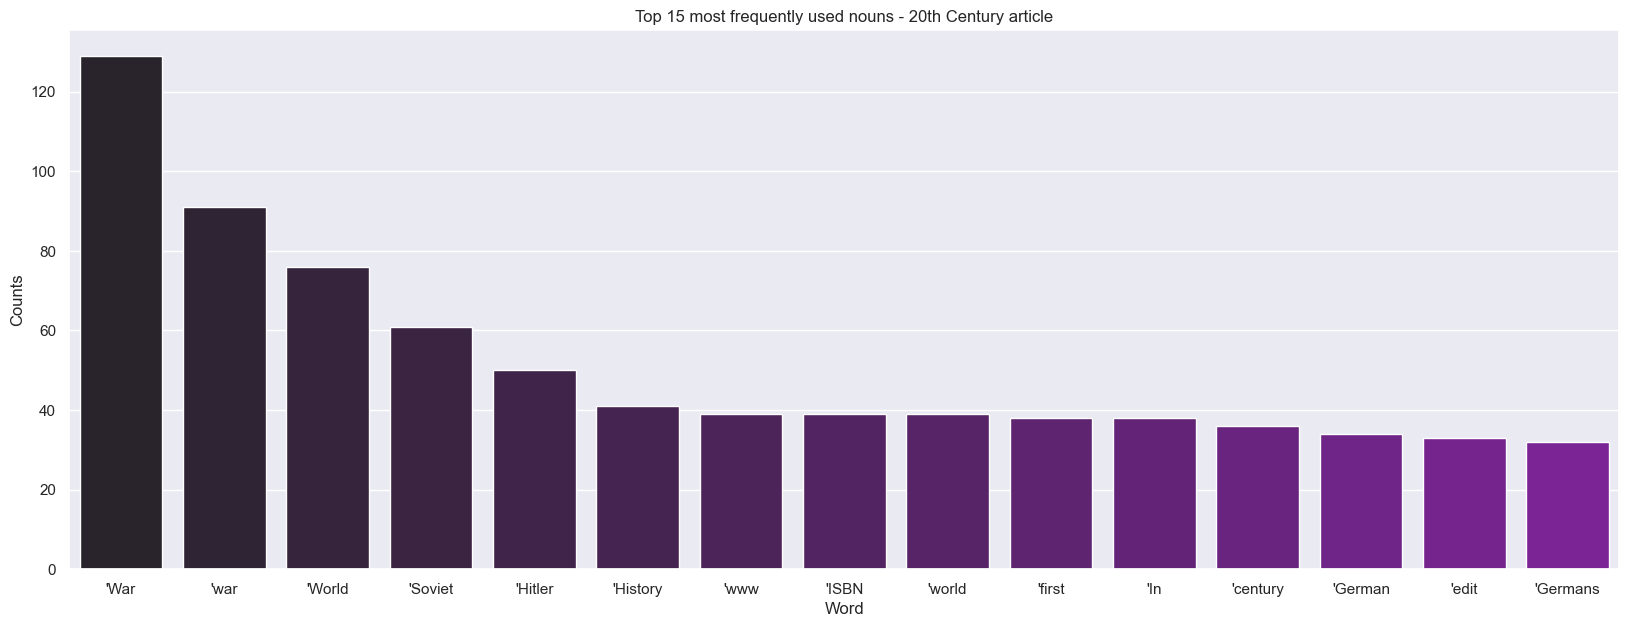

In [78]:
# Create bar plot for top 15 most used nouns

plt.figure(figsize=(20, 7))
with sns.dark_palette("xkcd:purple", 15):
    sns.barplot(x="Word", y="Counts",
    saturation=0.9, data = top15_nouns).set_title("Top 15 most frequently used nouns - 20th Century article")

### Top 15 Verbs

In [76]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Counts"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Counts'], ascending=False)
top15_verbs = y.nlargest(15, 'Counts')

In [77]:
top15_verbs

,Word,Counts
27,'Retrieved,205
36,'United,30
0,'Allied,19
196,'led,15
316,'used,13
194,'launched,12
1,'Archived,10
93,'controlled,9
161,'forced,8
77,'changed,7


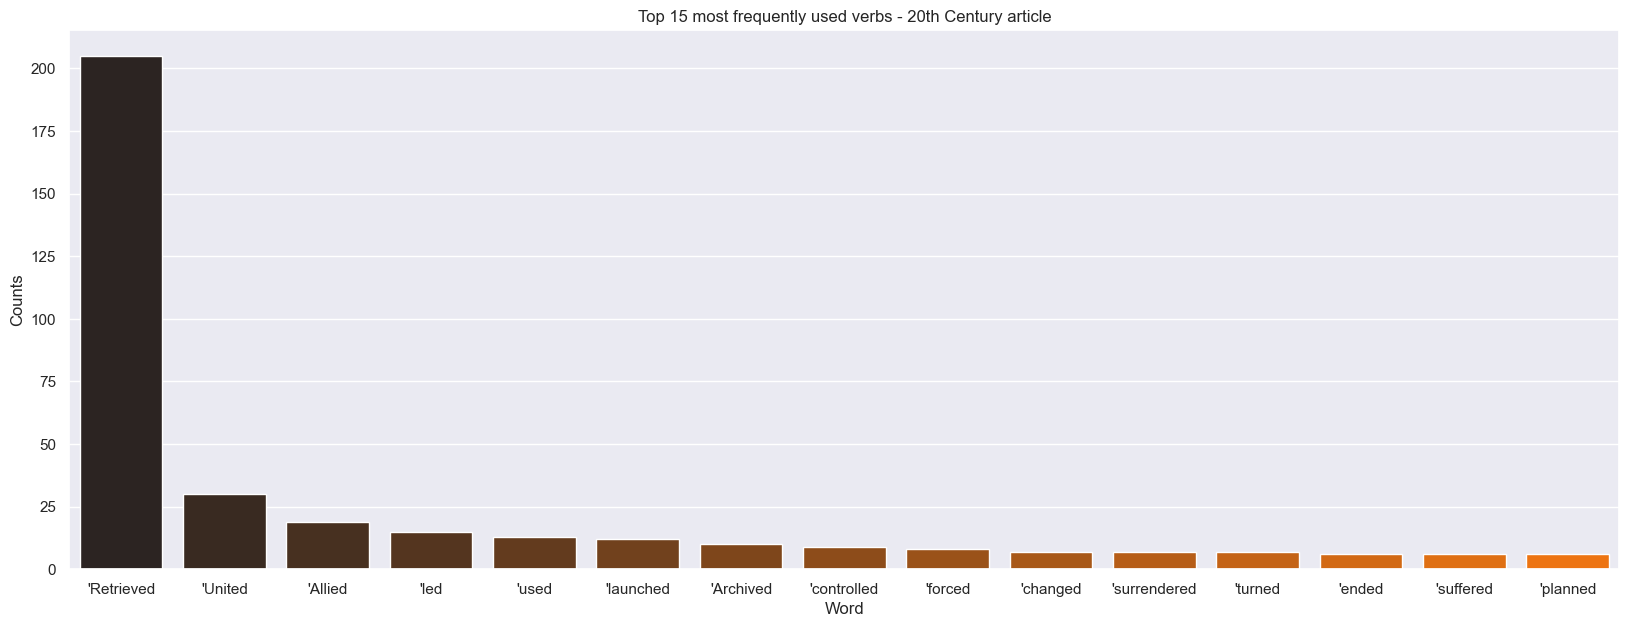

In [88]:
# Create bar plot for top 15 most used verbs

plt.figure(figsize=(20, 7))
with sns.dark_palette("xkcd:orange", 15):
    sns.barplot(x="Word", y="Counts",
    saturation=0.9, data = top15_verbs).set_title("Top 15 most frequently used verbs - 20th Century article")

### Top 15 Adjectives

In [81]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Counts"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Counts'], ascending=False)
top15_adj = y.nlargest(15, 'Counts')

In [82]:
top15_adj

,Word,Counts
27,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
42,'Russian,6
103,'political,6
1,'African,6
104,'possible,5
7,'Baltic,5


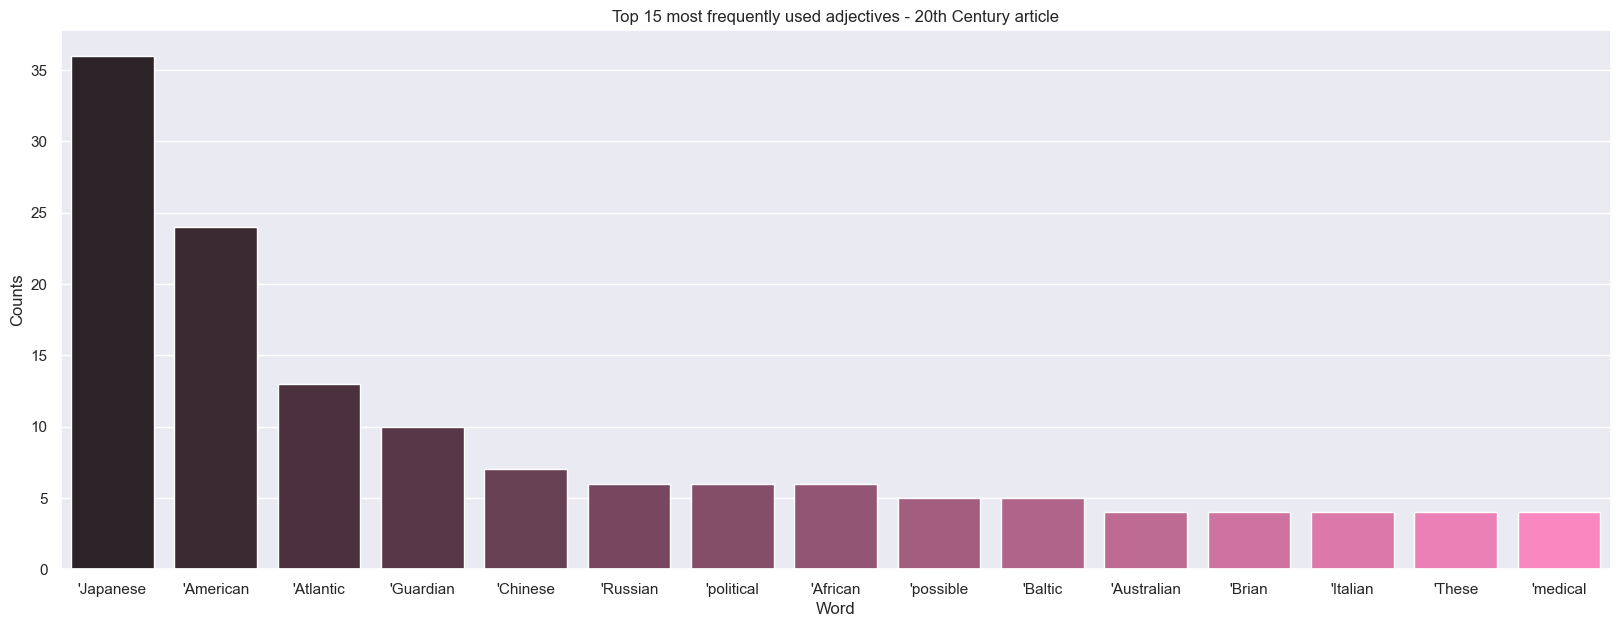

In [87]:
# Create bar plot for top 15 most used adjectives

plt.figure(figsize=(20, 7))
with sns.dark_palette("xkcd:pink", 15):
    sns.barplot(x="Word", y="Counts",
    saturation=0.9, data = top15_adj).set_title("Top 15 most frequently used adjectives - 20th Century article")

##### The vertical bar plots display the top 15 nouns, verbs, and adjectives from the 20th-century article. Nouns like “War” and “World” dominate, reflecting the article’s focus on major historical themes. Verbs such as “Retrieved”  emphasize significant actions and processes. Adjectives like “Japanese” and “American” provide important descriptive context. However, some words  don't actually belong to their group such as 'United' from United States counted in verbs,and there are some verbs such as 'edit' in the noun group. However, overall these words highlights their relevance, showing how they contribute to the article’s narrative and portrayal of historical events.

### Country Names Occurences

In [89]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events centuryToggle Historic events century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsKey events

In [90]:
# Create a count for the country names

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [91]:
all_counts

Counter({'Retrieved': 205,
         'War': 129,
         'war': 91,
         'World': 76,
         'Soviet': 61,
         'Hitler': 50,
         'Germany': 43,
         'History': 41,
         'world': 39,
         'www': 39,
         'ISBN': 39,
         'In': 38,
         'first': 38,
         'century': 36,
         'Japanese': 36,
         'would': 35,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'II': 30,
         'United': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'end': 24,
         'American': 24,
         'history': 23,
         'This': 23,
         'attack': 23,
         'weapons': 23,
         'new': 22,
         'Holocaust': 21,
         'Stalin': 21,
         'Africa': 21,
      

In [102]:
country = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [103]:
country

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola
...,...
205,Sahrawi Arab Democratic Republic
206,Somaliland
207,South Ossetia
208,Taiwan


In [105]:
# Removing any spaces from the country_name column

country['country_name'] = country['country_name'].str.strip()

In [106]:
country_list = country['country_name'].to_list()

In [107]:
dict_of_counts = {d : all_counts[d] for d in country_list}

In [108]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [109]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [110]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df = df.transpose().reset_index()

In [113]:
df.rename(columns = {"index":"Country", 0:"Occurences"}, inplace = True)

In [114]:
df

,Country,Occurences
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


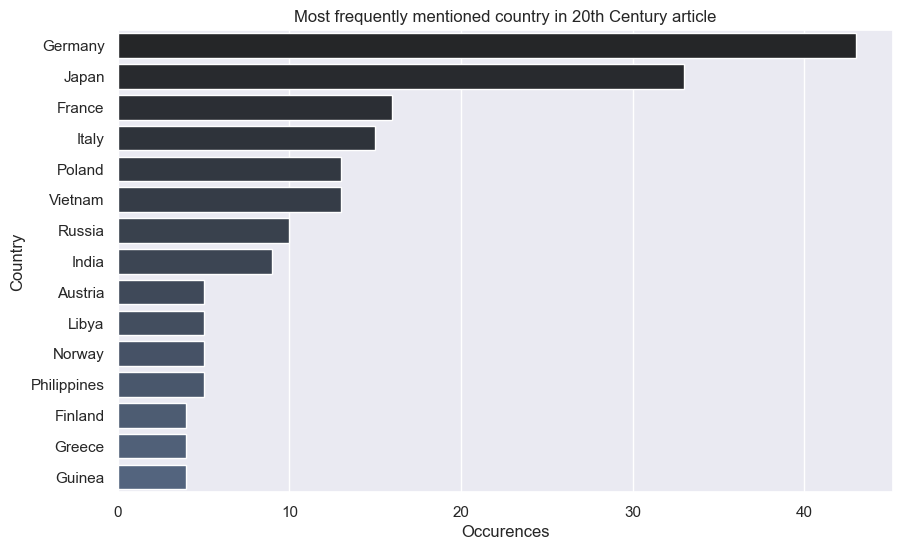

In [119]:
# Create a plot for the country name occurences in the 20th century article

top15_country = df.nlargest(15, 'Occurences')

plt.figure(figsize=(10, 6))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Occurences", y = "Country",
    saturation=0.9, data = top15_country).set_title("Most frequently mentioned country in 20th Century article")

##### Based on the above plot, we can see that Germany and Japan are the two country that is most frequently mentioned in the article. 